In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid
from sklearn import datasets, svm

In [58]:
# import data
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [112]:
# create parameter grid
C_range = np.logspace(-10, 0, 11)
gamma_range = np.logspace(-3, 3, 7)
param_grid = {
    'C': C_range,
    'gamma': gamma_range
}

In [113]:
# train models
cv = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=5)
cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00]), 'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

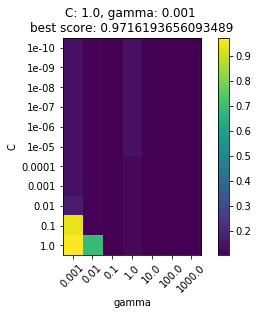

In [127]:
# # plot relationship between scores and parameters
# gamma_list = [item['gamma'] for item in param_grid]
# C_list = [item['C'] for item in param_grid]
mean_scores = cv.cv_results_['mean_test_score']

plt.imshow(mean_scores.reshape(len(C_range), len(gamma_range)))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.yticks(np.arange(len(C_range)), C_range)
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.title('C: %s, gamma: %s \nbest score: %s' % 
          (cv.best_params_['C'], cv.best_params_['gamma'], cv.best_score_))
plt.show()

array([0.14134669, 0.11129661, 0.10239288, 0.14134669, 0.10239288,
       0.10127991, 0.10127991, 0.14134669, 0.11129661, 0.10239288,
       0.14134669, 0.10239288, 0.10127991, 0.10127991, 0.14134669,
       0.11129661, 0.10239288, 0.14134669, 0.10239288, 0.10127991,
       0.10127991, 0.14134669, 0.11129661, 0.10239288, 0.14134669,
       0.10239288, 0.10127991, 0.10127991, 0.14134669, 0.11129661,
       0.10239288, 0.14134669, 0.10239288, 0.10127991, 0.10127991,
       0.14134669, 0.11129661, 0.10239288, 0.14134669, 0.10239288,
       0.10127991, 0.10127991, 0.14134669, 0.11129661, 0.10239288,
       0.1213133 , 0.10239288, 0.10127991, 0.10127991, 0.14134669,
       0.11129661, 0.10239288, 0.1213133 , 0.10239288, 0.10127991,
       0.10127991, 0.17250974, 0.11129661, 0.10239288, 0.1213133 ,
       0.10239288, 0.10127991, 0.10127991, 0.94323873, 0.11129661,
       0.10239288, 0.1213133 , 0.10239288, 0.10127991, 0.10127991,
       0.97161937, 0.6950473 , 0.10406233, 0.1213133 , 0.10239

In [117]:
cv.best_params_

{'C': 1.0, 'gamma': 0.001}